In [40]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import datetime as dt
import yfinance as yf

In [41]:
stocks = "GOOG SPY".split()
start = dt.date.today() - dt.timedelta(365)

In [48]:
data = yf.download(stocks, start)["Close"]
data.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,GOOG,SPY
Date,,
2023-05-01,107.709999,415.510010
2023-05-02,105.980003,410.839996
2023-05-03,106.120003,408.019989
2023-05-04,105.209999,405.130005
2023-05-05,106.214996,412.630005


In [49]:
#don't need closing prices directly, calc instant rate of return for google and spy
returns = (np.log(data).diff()).dropna()
returns.head()

Ticker,GOOG,SPY
Date,,
2023-05-02,-0.016192,-0.011303
2023-05-03,0.001320,-0.006888
2023-05-04,-0.008612,-0.007108
2023-05-05,0.009507,0.018343
2023-05-08,0.018886,0.000267


In [51]:
#start looking at regression, correlation with pandas
returns.corr()
sample= returns.sample(60).corr()
sample

Ticker,GOOG,SPY
Ticker,,
GOOG,1.000000,0.461619
SPY,0.461619,1.000000


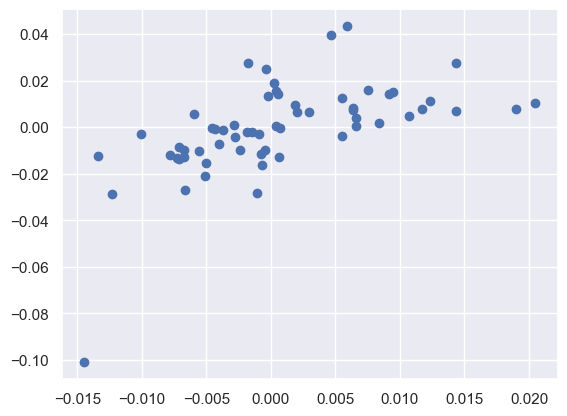

In [52]:
#get smaller df
sample = returns.sample(60)
#plot, spy is ind var, google is dependent
plt.scatter(x=sample['SPY'], y=sample['GOOG']);

In [55]:
reg = np.polyfit(sample['SPY'], sample['GOOG'], deg = 1)
reg

array([ 1.53990385e+00, -1.32118714e-03])

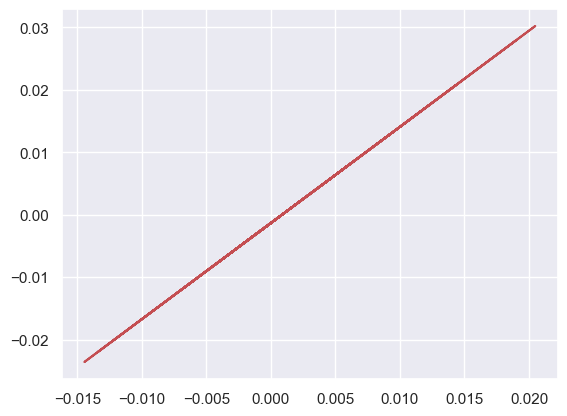

In [59]:
trend = np.polyval(reg, sample['SPY'])
plt.plot(sample["SPY"], trend, 'r');
#line of best fit

In [64]:
#regression as a technical indicator
#save as a dataframe
data = pd.DataFrame(yf.download('SPY', start)['Close'])
#serialize time, 
time = np.arange(1, len(data) +1)
data['time'] = time
data = data[['time', 'Close']]
#round data
data = round(data,2)
data.tail()

[*********************100%%**********************]  1 of 1 completed


,time,Close
Date,,
2024-04-23,247,505.65
2024-04-24,248,505.41
2024-04-25,249,503.49
2024-04-26,250,508.26
2024-04-29,251,510.06


In [65]:
reg = np.polyfit(data['time'], data["Close"], deg = 1)
reg

array([4.01692795e-01, 4.09049377e+02])

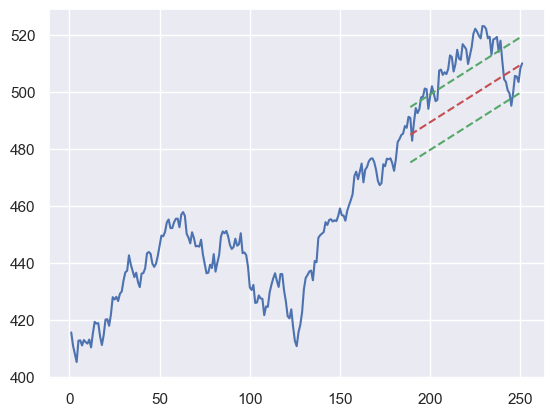

In [66]:
trend = np.polyval(reg, data['time'][-63:])
std = data['Close'][-63:].std()
plt.plot(data['time'], data['Close'], label = "S&P500")
plt.plot(data['time'][-63:], trend, 'r--')
plt.plot(data['time'][-63:], trend - std, 'g--')
plt.plot(data['time'][-63:], trend + std, 'g--')

In [68]:
predict = np.poly1d(reg)
predict(254)

511.0793470233357

In [69]:
predict = np.poly1d(reg)
predict(300)

529.5572155719983

<Axes: xlabel='time', ylabel='Close'>

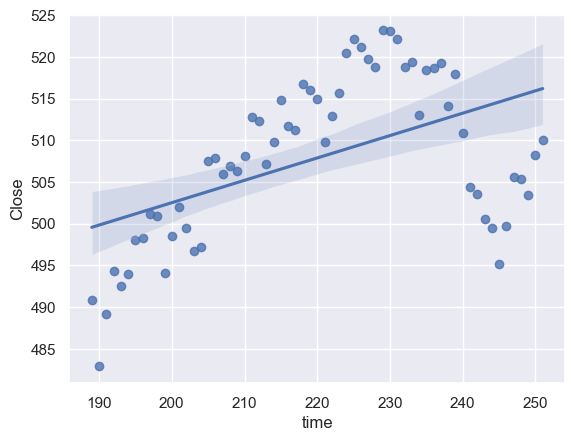

In [70]:
#Simple scatter plot with trend line
sb.regplot(x='time', y='Close', fit_reg=True, data=data[-63:])